<a href="https://colab.research.google.com/github/Yang-Hyun-Jun/Competition/blob/main/Solar_power_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
import plotly.express as px

#시각화 관련
import seaborn as sns
import matplotlib.pyplot as plt
#디스플레이 (선명도 설정)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
#스타일 지정
plt.style.use("seaborn-whitegrid")

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from tensorflow.keras.layers import LSTM, Dense, Conv2D, MaxPooling2D, Flatten, GRU, TimeDistributed, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/sunlight/data/"

In [ ]:
target = pd.read_csv(path + "energy.csv")
target['times'] = pd.date_range(start='2018-03-01 01:00:00', end='2021-02-01 00:00:00', freq='H')
target = target.set_index("times")
target = target[["dangjin_floating", "dangjin_warehouse", "dangjin", "ulsan"]]
target

,dangjin_floating,dangjin_warehouse,dangjin,ulsan
times,,,,
2018-03-01 01:00:00,0.0,0.0,0,0
2018-03-01 02:00:00,0.0,0.0,0,0
2018-03-01 03:00:00,0.0,0.0,0,0
2018-03-01 04:00:00,0.0,0.0,0,0
2018-03-01 05:00:00,0.0,0.0,0,0
...,...,...,...,...
2021-01-31 20:00:00,0.0,0.0,0,0
2021-01-31 21:00:00,0.0,0.0,0,0
2021-01-31 22:00:00,0.0,0.0,0,0


### 평균 시각화

In [ ]:
aa = target.describe().loc[["mean"]].T
aa = aa.sort_values("mean", ascending=False)
aa

,mean
dangjin,139.653285
dangjin_floating,122.056311
dangjin_warehouse,92.476665
ulsan,64.159761


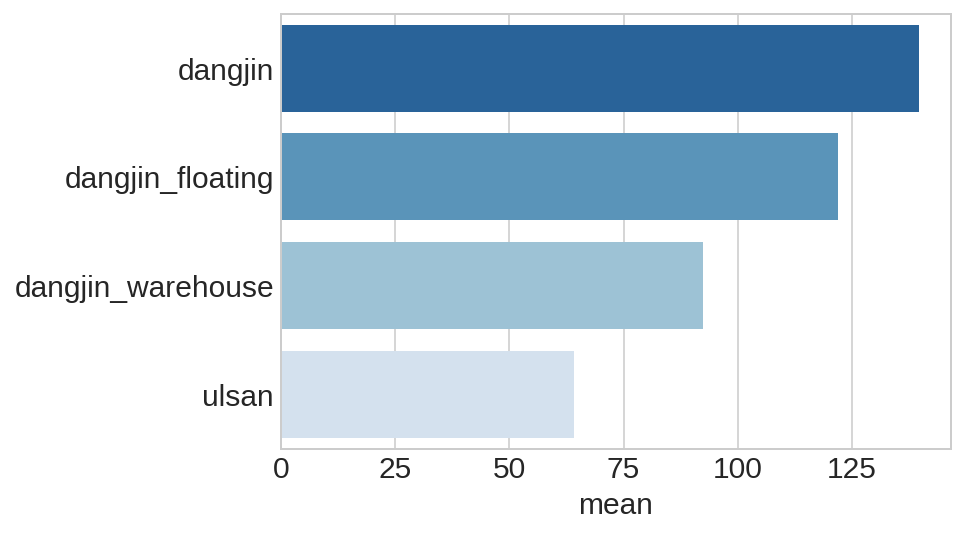

In [ ]:
plt.rc('font', size=15)
sns.barplot(data = aa, y=aa.index, x="mean", palette="Blues_r")

In [ ]:
target.describe()

,dangjin_floating,dangjin_warehouse,dangjin,ulsan
count,25608.000000,25584.000000,25632.000000,25632.000000
mean,122.056311,92.476665,139.653285,64.159761
std,192.041585,146.423366,220.491387,101.020447
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,191.000000,145.000000,227.000000,101.000000
max,753.000000,593.000000,867.000000,392.000000


###발전량 시각화

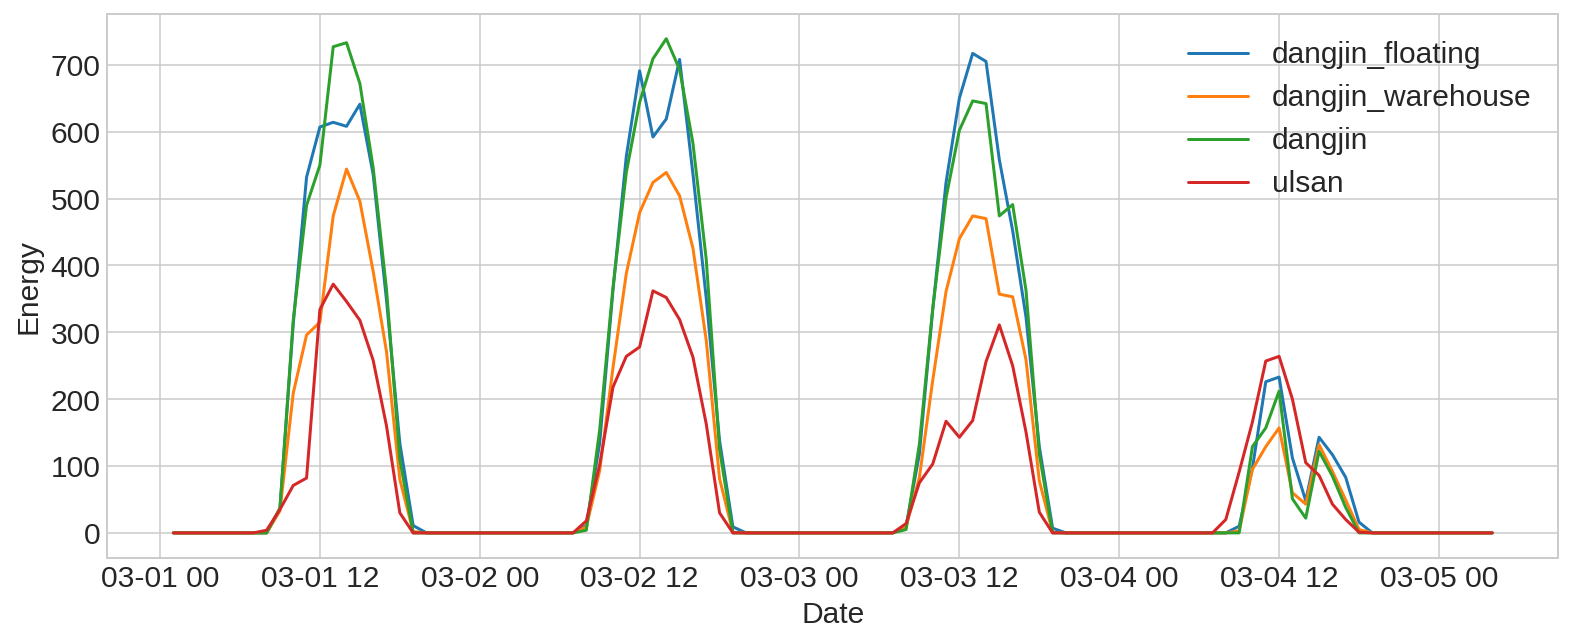

In [ ]:
#일별 시각화
plt.figure(figsize=(13,5))
plt.rc('font', size=15)
plt.xlabel("Date")
plt.ylabel("Energy")
plt.plot(target["dangjin_floating"][:100], label="dangjin_floating")
plt.plot(target["dangjin_warehouse"][:100], label="dangjin_warehouse")
plt.plot(target["dangjin"][:100], label="dangjin")
plt.plot(target["ulsan"][:100], label="ulsan")
plt.legend(loc="upper right")

In [ ]:
# 월별 시각화
energy = pd.read_csv(path + "energy.csv")
energy['times'] = pd.date_range(start='2018-03-01 01:00:00', end='2021-02-01 00:00:00', freq='H')
energy = target.set_index("times")
energy['times'] = pd.date_range(start='2018-03-01 01:00:00', end='2021-02-01 00:00:00', freq='H')
energy

energy['time'] = pd.to_datetime(energy['times'])
energy['month'] = energy['time'].dt.month
energy['hour'] = energy['time'].dt.hour

mean_month = energy.groupby('month').mean()
mean_month

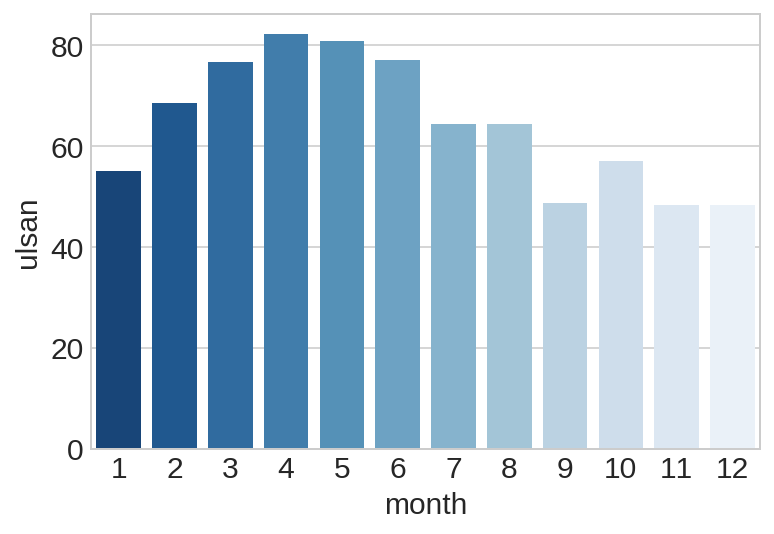

In [ ]:
plt.rc('font', size=15)

# sns.barplot(data=mean_month, x = mean_month.index, y="dangjin_floating", palette="Blues_r")
# sns.barplot(data=mean_month, x = mean_month.index, y="dangjin", palette="Blues_r")
sns.barplot(data=mean_month, x = mean_month.index, y="ulsan", palette="Blues_r")
# sns.barplot(data=mean_month, x = mean_month.index, y="dangjin_warehouse", palette="Blues_r")

In [ ]:
#박스플롯 분포 확인
plt.rc('font', size=25)
plt.figure(figsize=(10,5))

col = list(target.columns)
target2 = target[(target[col[0]]>0) & (target[col[1]]>0) & (target[col[1]]>0) & (target[col[1]]>0)]

sns.boxplot(x="ulsan", data=target2)
plt.xlabel("Energy")
plt.ylabel("ulsan")
plt.show()

In [ ]:
#시간별 시각화
mean_hour = energy.groupby('hour').mean()
mean_hour

plt.rc('font', size=50)
plt.figure(figsize=(27,9))
# sns.barplot(data=mean_hour, x = mean_hour.index, y="dangjin_floating", palette="Blues_r")
# sns.barplot(data=mean_hour, x = mean_hour.index, y="dangjin", palette="Blues_r")
sns.barplot(data=mean_hour, x = mean_hour.index, y="ulsan", palette="Blues_r")
# sns.barplot(data=mean_hour, x = mean_hour.index, y="dangjin_warehouse", palette="Blues_r")

### 상관관계

In [ ]:
co_data.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud',
       '일조(hr)', '일사(MJ/m2)'],
      dtype='object')

In [ ]:
col1 = list(target.columns)
col2 = list(dangjin_input.columns)

target3 = target.loc["2018-03-02 00:00:00":"2021-02-01 23:00:00"][col1[3]]
dangjin_fc = dangjin_input.loc["2018-03-02 00:00:00":"2021-02-01 23:00:00"][col2[:5] + col2[-2:]]
co_data = pd.concat([target3, dangjin_fc], axis=1)
co_data["duration"] = co_data["일조(hr)"]
co_data["solradi"] = co_data["일사(MJ/m2)"]
co_data = co_data.drop(["일조(hr)", "일사(MJ/m2)"], axis=1)
co = co_data.corr()
co

,ulsan,Temperature,Humidity,WindSpeed,WindDirection,Cloud,duration,solradi
ulsan,1.000000,0.201052,-0.540637,0.027182,0.115061,-0.161141,0.690294,0.840019
Temperature,0.201052,1.000000,0.204066,-0.174547,-0.206393,0.048366,0.176159,0.314048
Humidity,-0.540637,0.204066,1.000000,-0.237344,-0.238001,0.268363,-0.550029,-0.543269
WindSpeed,0.027182,-0.174547,-0.237344,1.000000,0.178845,0.111741,0.014771,0.006249
WindDirection,0.115061,-0.206393,-0.238001,0.178845,1.000000,-0.170115,0.126482,0.080256
Cloud,-0.161141,0.048366,0.268363,0.111741,-0.170115,1.000000,-0.300832,-0.211896
duration,0.690294,0.176159,-0.550029,0.014771,0.126482,-0.300832,1.000000,0.835694
solradi,0.840019,0.314048,-0.543269,0.006249,0.080256,-0.211896,0.835694,1.000000


In [ ]:
plt.rc('font', size=20)
plt.figure(figsize=(15,8))

mask = np.zeros_like(co, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# heat = sns.heatmap(co, cmap = "Blues", annot=True, mask=mask, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1, linewidths=.5, cbar=False)
# heat.figure.axes[-1].yaxis.label.set_size(100)
# heat

plt.figure(figsize=(15,8))
with plt.style.context({'axes.labelsize':20,
                        'xtick.labelsize':20,
                        'ytick.labelsize':20}):
    ax = sns.heatmap(co, cmap = "Blues", annot=True, mask=mask, cbar_kws={"shrink": .5}, vmin = -1,vmax = 1, linewidths=.5, cbar=False)

### 모델링과 추론

In [ ]:
dangjin_fcst = pd.read_csv(path + "dangjin_fcst_data.csv")
ulsan_fcst = pd.read_csv(path + "ulsan_fcst_data.csv")

In [ ]:
def to_date(x):
  return pd.DateOffset(hours=x)

def fcst_gen(data):
  data["Forecast_time"] = pd.to_datetime(data["Forecast time"])
  fcst_14 = data[data['Forecast_time'].dt.hour==14]
  fcst_14 = fcst_14[(fcst_14['forecast']>=10)&(fcst_14['forecast']<=33)]
  fcst_14['Forecast_time'] = fcst_14['Forecast_time'] + fcst_14['forecast'].map(to_date)
  fcst_14 = fcst_14[['Forecast_time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]
  fcst_14_ = pd.DataFrame()
  fcst_14_['Forecast_time'] = pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='H')
  fcst_14_ = pd.merge(fcst_14_, fcst_14, on='Forecast_time', how='outer')
  fcst_14_ = fcst_14_.interpolate()
  fcst_14_ = fcst_14_.set_index("Forecast_time")
  return fcst_14_

def time_sign():
  date_time = pd.DataFrame()
  date_time['time'] = pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='H')
  timestamp_s = date_time["time"].map(datetime.datetime.timestamp)

  day = 24*60*60
  year = 365*day

  df = pd.DataFrame()
  df["Forecast_time"] = pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='H')

  df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
  df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
  df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
  df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
  df = df.set_index("Forecast_time")
  df = df[['Day sin', 'Day cos', 'Year sin', 'Year cos']]
  return df

In [ ]:
dangjin_fcst_14 = fcst_gen(dangjin_fcst)
dangjin_fcst_14 = pd.concat([dangjin_fcst_14, time_sign()], axis=1)
ulsan_fcst_14 = fcst_gen(ulsan_fcst)
ulsan_fcst_14 = pd.concat([ulsan_fcst_14, time_sign()], axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning:

Adding/subtracting object-dtype array to DatetimeArray not vectorized

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning:

Adding/subtracting object-dtype array to DatetimeArray not vectorized



In [ ]:
dangjin_fcst_14

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Day sin,Day cos,Year sin,Year cos
Forecast_time,,,,,,,,,
2018-03-02 00:00:00,-2.000000,55.000000,6.7,336.000000,1.0,-6.412004e-12,1.000000,0.945596,0.325342
2018-03-02 01:00:00,-2.666667,55.000000,6.3,337.000000,1.0,2.588190e-01,0.965926,0.945829,0.324664
2018-03-02 02:00:00,-3.333333,55.000000,5.9,338.000000,1.0,5.000000e-01,0.866025,0.946062,0.323985
2018-03-02 03:00:00,-4.000000,55.000000,5.5,339.000000,1.0,7.071068e-01,0.707107,0.946294,0.323307
2018-03-02 04:00:00,-4.333333,56.666667,5.1,340.666667,1.0,8.660254e-01,0.500000,0.946526,0.322628
...,...,...,...,...,...,...,...,...,...
2021-03-01 19:00:00,6.333333,85.000000,6.3,31.666667,4.0,-9.659258e-01,0.258819,0.949942,0.312426
2021-03-01 20:00:00,5.666667,85.000000,6.1,29.333333,4.0,-8.660254e-01,0.500000,0.950166,0.311744
2021-03-01 21:00:00,5.000000,85.000000,5.9,27.000000,4.0,-7.071068e-01,0.707107,0.950389,0.311063


In [ ]:
d1 = pd.read_csv(path + "dangjin/서산 일조 일사 2018-03-01 ~ 2019-03-01.csv", encoding="cp949")
d2 = pd.read_csv(path + "dangjin/서산 일조 일사 2019-03-01 ~ 2020-03-01.csv", encoding="cp949")
d3 = pd.read_csv(path + "dangjin/서산 일조 일사 2020-03-01 ~ 2021-03-01.csv", encoding="cp949")

u1 = pd.read_csv(path + "ulsan/양산 일조 일사 2018-03-01 ~ 2019-03-01.csv", encoding="cp949")
u2 = pd.read_csv(path + "ulsan/양산 일조 일사 2019-03-01 ~ 2020-03-01.csv", encoding="cp949")
u3 = pd.read_csv(path + "ulsan/양산 일조 일사 2020-03-01 ~ 2021-03-01.csv", encoding="cp949")

dangjin_sun = pd.concat([d1, d2, d3], axis=0)[["일시", "일조(hr)", "일사(MJ/m2)"]]
ulsan_sun = pd.concat([u1, u2, u3], axis=0)[["일시", "일조(hr)", "일사(MJ/m2)"]]

dangjin_sun["time"] = pd.to_datetime(dangjin_sun["일시"])
ulsan_sun["time"] = pd.to_datetime(ulsan_sun["일시"])

times = pd.DataFrame()
times["time"] = pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='H')

dangjin_sun = pd.merge(times, dangjin_sun, on="time", how="left")
dangjin_sun = dangjin_sun.fillna(0)
dangjin_sun = dangjin_sun.set_index("time")
dangjin_sun = dangjin_sun[["일조(hr)", "일사(MJ/m2)"]]

ulsan_sun = pd.merge(times, ulsan_sun, on="time", how="left")
ulsan_sun = ulsan_sun.fillna(0)
ulsan_sun = ulsan_sun.set_index("time")
ulsan_sun = ulsan_sun[["일조(hr)", "일사(MJ/m2)"]]

In [ ]:
dangjin_input = pd.concat([dangjin_fcst_14, dangjin_sun], axis=1)
dangjin_input = dangjin_input.loc["2018-03-02 00:00:00":"2021-02-01 00:00:00"]

ulsan_input = pd.concat([ulsan_fcst_14, ulsan_sun], axis=1)
ulsan_input = ulsan_input.loc["2018-03-02 00:00:00":"2021-02-01 00:00:00"]

In [ ]:
ulsan_input

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Day sin,Day cos,Year sin,Year cos,일조(hr),일사(MJ/m2)
2018-03-02 00:00:00,0.000000,40.000000,1.500000,318.000000,2.000000,-6.412004e-12,1.000000,0.945596,0.325342,0.0,0.0
2018-03-02 01:00:00,-0.333333,41.666667,1.600000,314.666667,2.000000,2.588190e-01,0.965926,0.945829,0.324664,0.0,0.0
2018-03-02 02:00:00,-0.666667,43.333333,1.700000,311.333333,2.000000,5.000000e-01,0.866025,0.946062,0.323985,0.0,0.0
2018-03-02 03:00:00,-1.000000,45.000000,1.800000,308.000000,2.000000,7.071068e-01,0.707107,0.946294,0.323307,0.0,0.0
2018-03-02 04:00:00,-1.333333,45.000000,1.766667,303.333333,1.666667,8.660254e-01,0.500000,0.946526,0.322628,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 20:00:00,8.333333,66.666667,3.733333,197.666667,4.000000,-8.660254e-01,0.500000,0.684965,0.728576,0.0,0.0
2021-01-31 21:00:00,8.000000,70.000000,4.300000,196.000000,4.000000,-7.071068e-01,0.707107,0.685488,0.728084,0.0,0.0
2021-01-31 22:00:00,8.666667,68.333333,4.233333,195.333333,4.000000,-5.000000e-01,0.866025,0.686010,0.727592,0.0,0.0
2021-01-31 23:00:00,9.333333,66.666667,4.166667,194.666667,4.000000,-2.588190e-01,0.965926,0.686531,0.727100,0.0,0.0


In [ ]:
def input_gen(name):
  if name == "ulsan":
    input = ulsan_input
  else:
    input = dangjin_input
  return input

def target_gen(name):
  target = pd.read_csv(path + "energy.csv")
  target['times'] = pd.date_range(start='2018-03-01 01:00:00', end='2021-02-01 00:00:00', freq='H')
  target = target.set_index("times")
  target = target.loc["2018-03-02 00:00:00":"2021-02-01 00:00:00"]
  target = target[[name]]
  target = target.fillna(target.mean())
  return target  

def split(input, target):
  train_input = input.loc["2018-03-02 00:00:00":"2020-12-31 23:00:00"]
  valid_input = input.loc["2021-01-01 00:00:00":"2021-02-01 00:00:00"]

  train_target = target.loc["2018-03-02 00:00:00":"2020-12-31 23:00:00"]
  valid_target = target.loc["2021-01-01 00:00:00":"2021-02-01 00:00:00"]

  train_input = train_input.to_numpy()
  valid_input = valid_input.to_numpy()
  train_target = train_target.to_numpy()
  valid_target = valid_target.to_numpy()
  return train_input, train_target, valid_input, valid_target

def scaler(data):
  for i in range(data.shape[1]):
    mean = data[:,i].mean()
    std = data[:,i].std()
    data[:,i] = (data[:,i]-mean)/std
  return data

def window_gen(inp, tar, size):
  inp_windowed = []
  tar_windowed = []
  total_size = size + 1
  for i in range(inp.shape[0]-total_size+1):
    inp_windowed.append(inp[i:i+size, :])
    tar_windowed.append(tar[i+size, :])
  inp_windowed = np.array(inp_windowed)
  tar_windowed = np.array(tar_windowed)
  return inp_windowed, tar_windowed

In [ ]:
name = "ulsan"
input = input_gen(name)
target = target_gen(name)

train_input, train_target, valid_input, valid_target = split(input, target)
train_input = scaler(train_input)
valid_input = scaler(valid_input)

train_input_windowed, train_target_windowed = window_gen(train_input, train_target, 24)
valid_input_windowed, valid_target_windowed = window_gen(valid_input, valid_target, 24)

print(train_input_windowed.shape)
print(train_target_windowed.shape)
print(valid_input_windowed.shape)
print(valid_target_windowed.shape)

(24840, 24, 11)
(24840, 1)
(721, 24, 11)
(721, 1)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_input_windowed, train_target_windowed)).batch(32)
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_input_windowed, valid_target_windowed)).batch(32)
train_dataset

<BatchDataset shapes: ((None, 24, 11), (None, 1)), types: (tf.float64, tf.int64)>

In [ ]:
model = Sequential()
model.add(LSTM(32, activation="tanh", return_sequences=True))
model.add(LSTM(32, activation="tanh", return_sequences=False))
model.add(Dense(1))

loss = Huber()
opti = Adam(learning_rate=3e-4)

model.compile(optimizer=opti, loss=loss)
hist = model.fit(train_dataset, validation_data=valid_dataset, epochs=60)

Epoch 1/60
777/777 [==============================] - 21s 22ms/step - loss: 60.8067 - val_loss: 52.8091
Epoch 2/60
777/777 [==============================] - 16s 21ms/step - loss: 57.1187 - val_loss: 52.5576
Epoch 3/60
777/777 [==============================] - 16s 21ms/step - loss: 54.7363 - val_loss: 49.0378
Epoch 4/60
777/777 [==============================] - 16s 21ms/step - loss: 52.7460 - val_loss: 48.4974
Epoch 5/60
777/777 [==============================] - 16s 21ms/step - loss: 50.9072 - val_loss: 46.4168
Epoch 6/60
777/777 [==============================] - 16s 21ms/step - loss: 49.1939 - val_loss: 45.3438
Epoch 7/60
777/777 [==============================] - 16s 21ms/step - loss: 47.5926 - val_loss: 43.8043
Epoch 8/60
777/777 [==============================] - 16s 21ms/step - loss: 46.1186 - val_loss: 42.6615
Epoch 9/60
777/777 [==============================] - 16s 21ms/step - loss: 44.6578 - val_loss: 41.4771
Epoch 10/60
777/777 [==============================] - 16s 21ms/

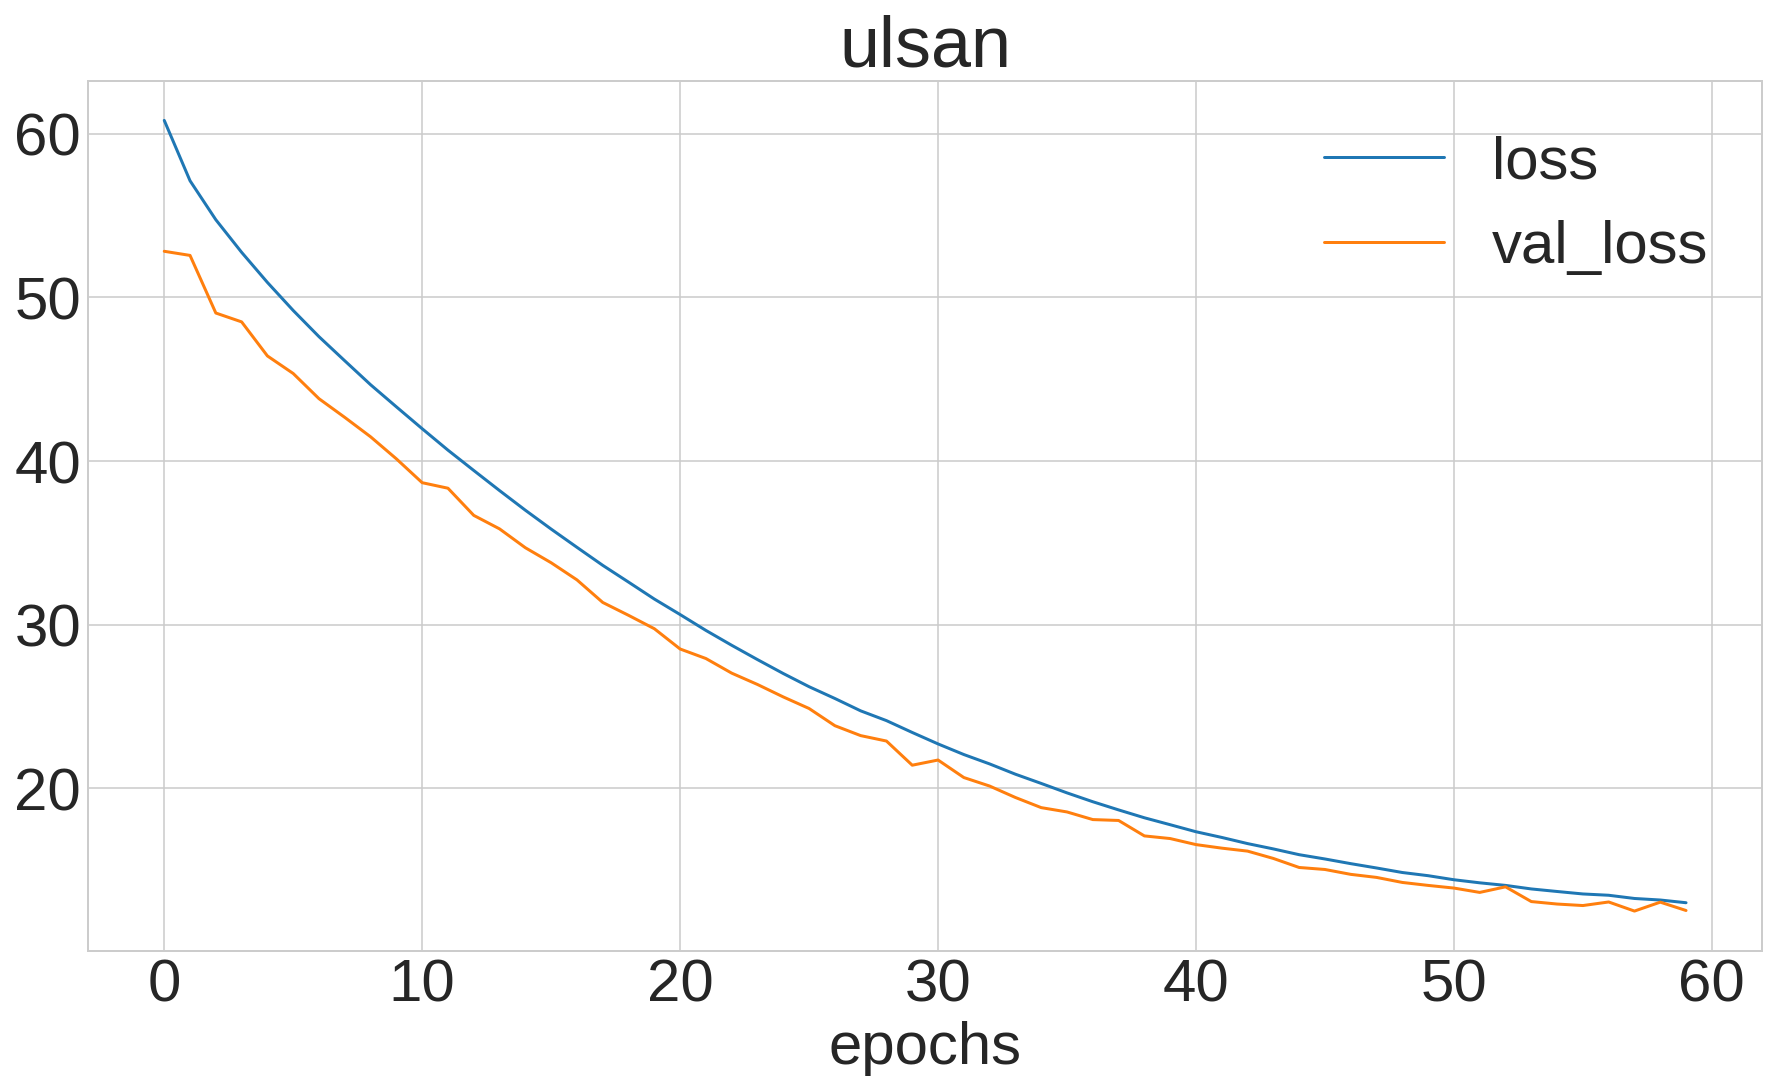

In [ ]:
plt.rc('font', size=30)
plt.figure(figsize=(15,8))

plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.title(name)
plt.xlabel("epochs")
plt.legend()

In [ ]:
pred = model.predict(valid_input_windowed)

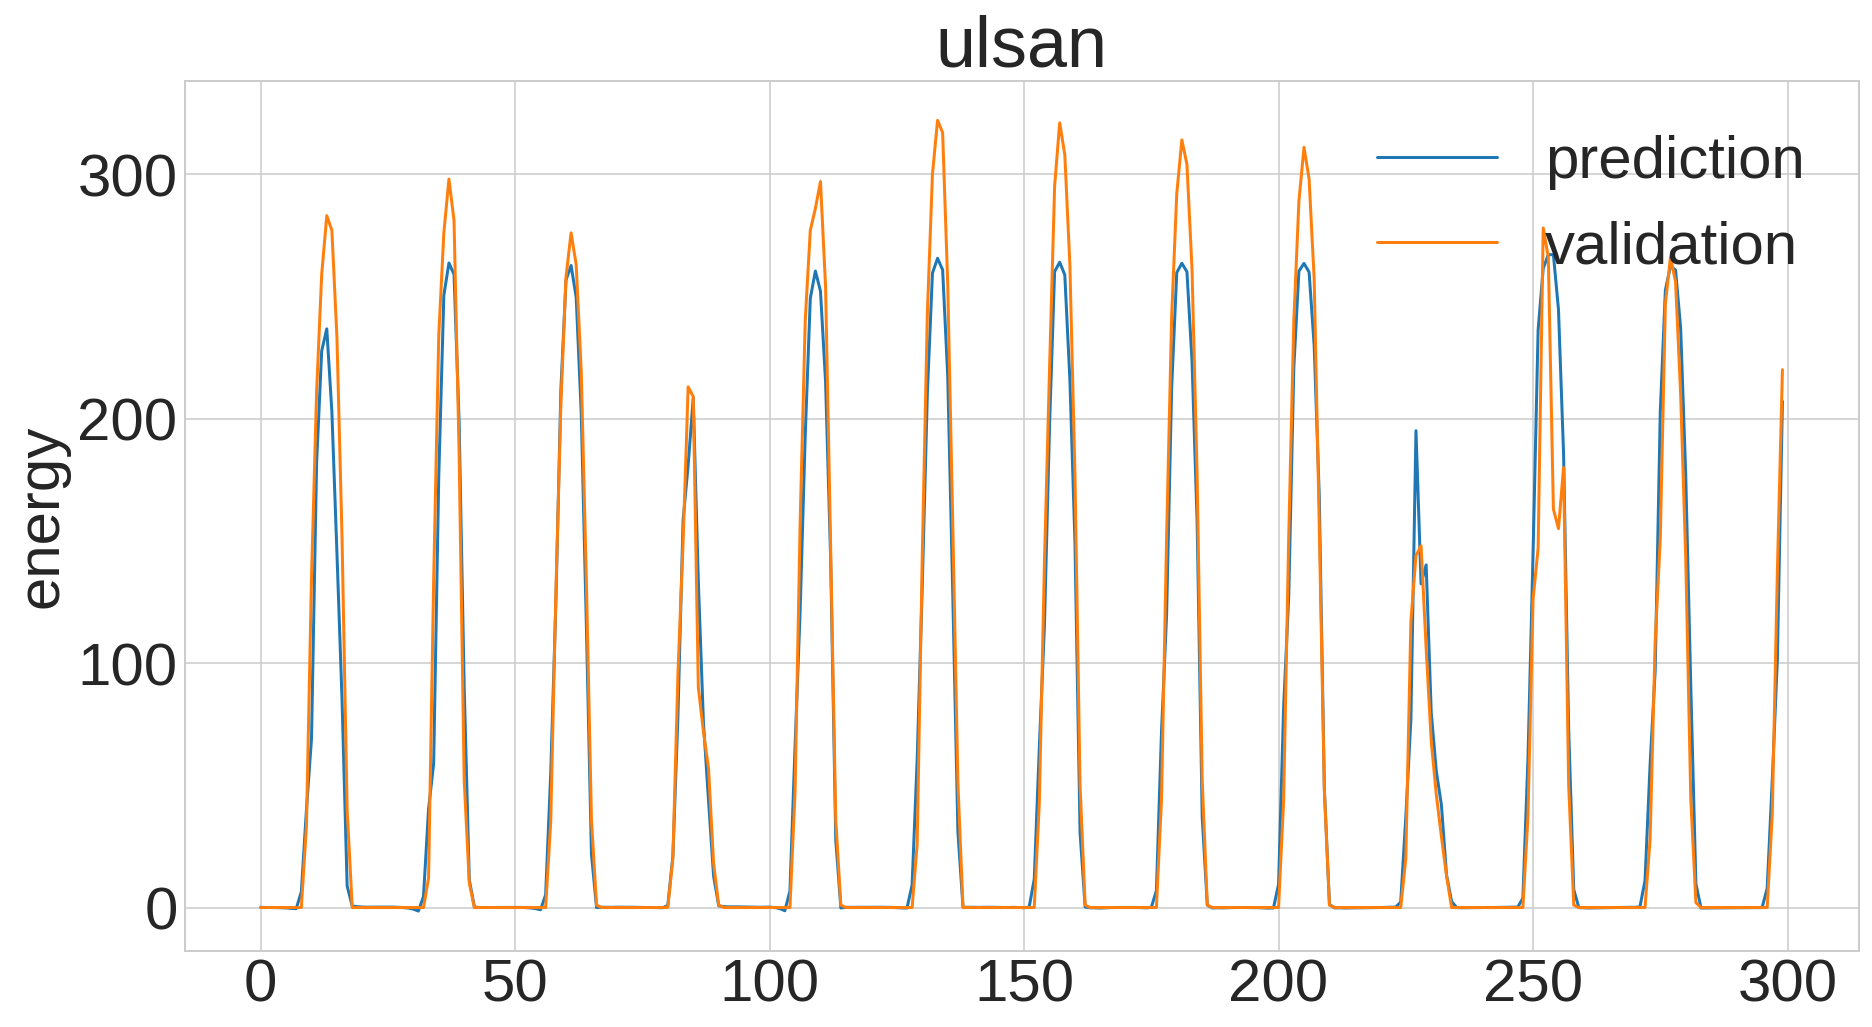

In [ ]:
plt.rc('font', size=30)
plt.figure(figsize=(15,8))

plt.plot(pred[:300], label="prediction")
plt.plot(valid_target_windowed[:300], label="validation")
plt.ylabel("energy")
plt.title(name)
plt.legend()

In [ ]:
#그라디언트 부스팅
x_train = model.predict(train_input_windowed)
y_train = train_target_windowed

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=500)
gbrt.fit(x_train, y_train)

errors = [mean_squared_error(valid_target_windowed, y_pred) for y_pred in gbrt.staged_predict(valid_target_windowed)]
bst_n_estimators = np.argmin(errors)+1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=28,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
retouch_pred = gbrt_best.predict(pred)
retouch_pred.shape

(721,)

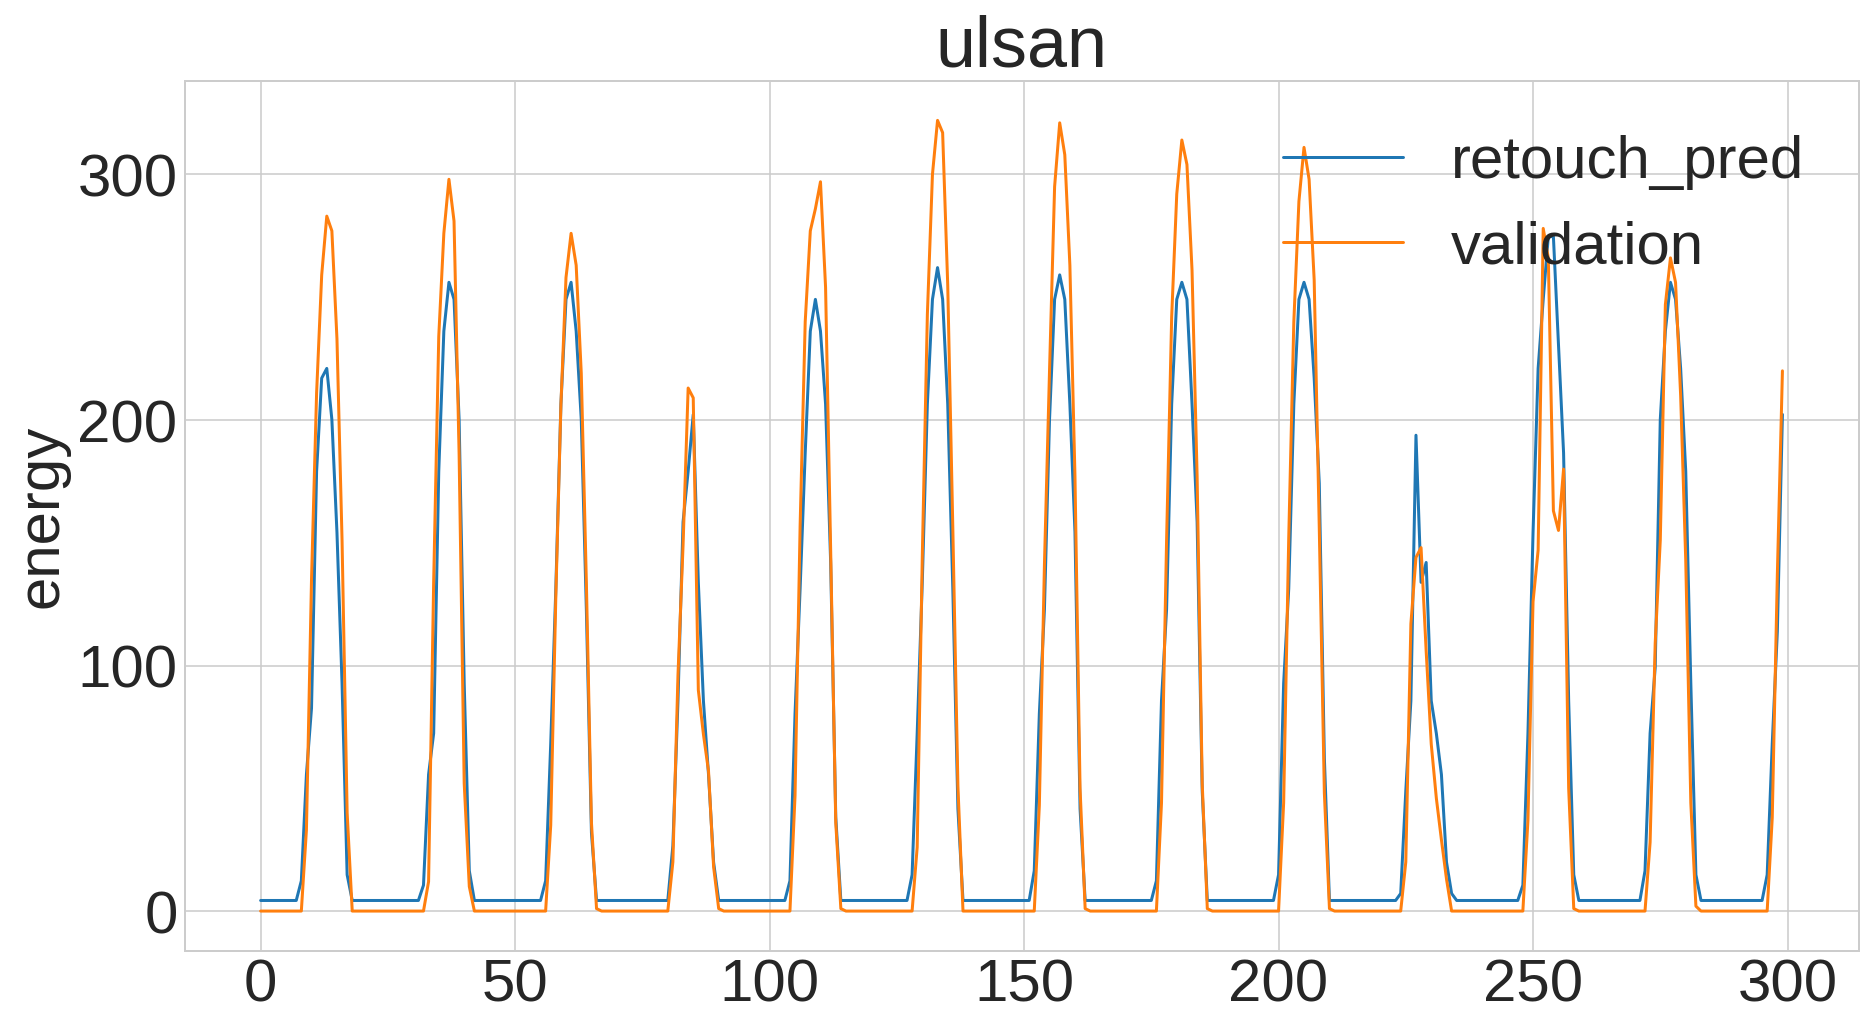

In [ ]:
plt.rc('font', size=30)
plt.figure(figsize=(15,8))

plt.plot(retouch_pred[:300], label="retouch_pred")
plt.plot(valid_target_windowed[:300], label="validation")
plt.ylabel("energy")
plt.title(name)
plt.legend(loc="upper right")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(test_target_windowed, retouch_pred))
print(mean_squared_error(test_target_windowed, pred))

print(mean_absolute_error(test_target_windowed, retouch_pred))
print(mean_absolute_error(test_target_windowed, pred))

4425.249338159018
4476.779899130077
35.86321702234872
33.03323294550966
